In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import yfinance as yf
from datetime import datetime  

# data collection 

In [23]:
now =datetime.now()
ticker="AAPL"
start=datetime(now.year-10 , now.month , now.day)
end= now
df = yf.download(ticker, start, end, timeout=60)

df

C:\Users\adnas\AppData\Local\Temp\ipykernel_5952\3485349484.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end, timeout=60)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-11-24,26.803751,26.909722,26.406927,26.454275,171212800
2015-11-25,26.612097,26.882661,26.587295,26.878150,85553200
2015-11-27,26.562498,26.697781,26.515150,26.670724,52185600
2015-11-30,26.672970,26.923240,26.548961,26.603073,156721200
2015-12-01,26.456520,26.787960,26.348296,26.774432,139409600
...,...,...,...,...,...
2025-11-17,267.459991,270.489990,265.730011,268.820007,45018300
2025-11-18,267.440002,270.709991,265.320007,269.989990,45677300


# exploring data and viualization `

In [24]:
df = df.reset_index(drop=True)


In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
df.shape


(2514, 5)

In [27]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [28]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,111.695294,112.810619,110.467735,111.588045,1.029948e+08
std,71.993271,72.692603,71.217116,71.916022,5.829575e+07
min,20.604073,20.907416,20.405651,20.526535,2.323470e+07
25%,41.043876,41.306769,40.700585,40.965840,6.312688e+07
50%,117.525757,119.050761,115.898841,117.320286,8.987460e+07
75%,170.738762,171.877691,168.678409,170.303310,1.261978e+08
max,275.250000,277.051436,272.089996,276.721738,5.334788e+08


In [29]:
df.dtypes


Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

Text(0.5, 1.0, 'AAPL')

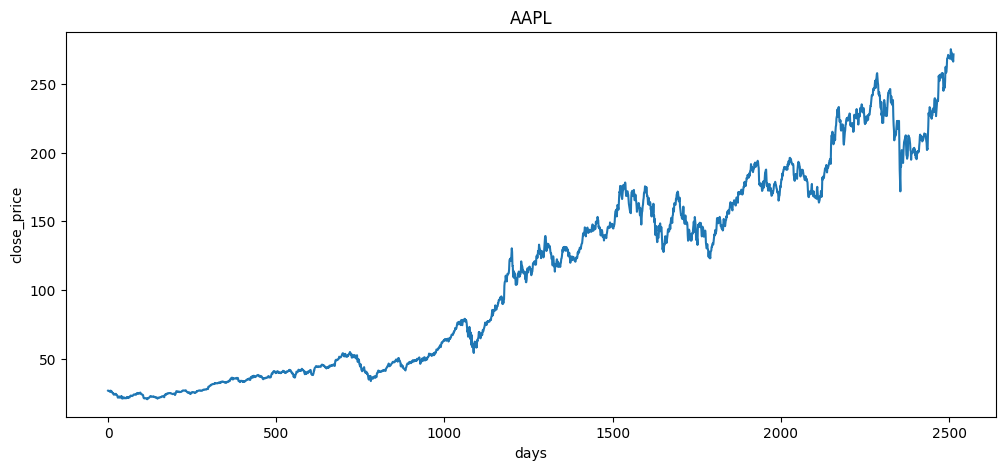

In [30]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.xlabel("days")
plt.ylabel("close_price")
plt.title(ticker)


# feature engeeniring

In [31]:
df["MA_CLOSE"] = df.Close.rolling(100).mean()


In [32]:
df.tail()

Price,Close,High,Low,Open,Volume,MA_CLOSE
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
2509,267.459991,270.489990,265.730011,268.820007,45018300,237.548421
2510,267.440002,270.709991,265.320007,269.989990,45677300,238.216246
2511,268.559998,272.209991,265.500000,265.529999,40424500,238.854457
2512,266.250000,275.429993,265.920013,270.829987,45823600,239.443123
2513,271.489990,273.329987,265.670013,265.950012,58784100,240.038086


In [33]:
df

Price,Close,High,Low,Open,Volume,MA_CLOSE
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
0,26.803751,26.909722,26.406927,26.454275,171212800,NaN
1,26.612097,26.882661,26.587295,26.878150,85553200,NaN
2,26.562498,26.697781,26.515150,26.670724,52185600,NaN
3,26.672970,26.923240,26.548961,26.603073,156721200,NaN
4,26.456520,26.787960,26.348296,26.774432,139409600,NaN
...,...,...,...,...,...,...
2509,267.459991,270.489990,265.730011,268.820007,45018300,237.548421
2510,267.440002,270.709991,265.320007,269.989990,45677300,238.216246
2511,268.559998,272.209991,265.500000,265.529999,40424500,238.854457


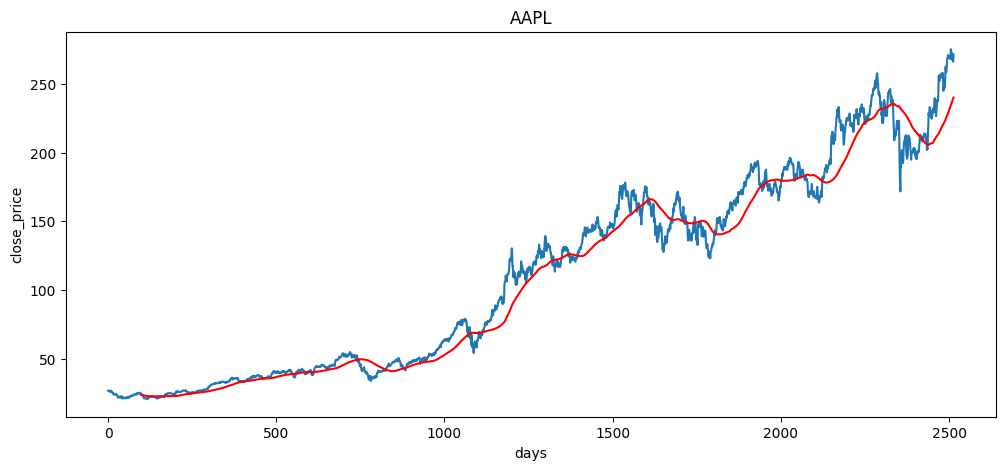

In [34]:
plt.figure(figsize=(12,5))
plt.xlabel("days")
plt.ylabel("close_price")
plt.title(ticker)
plt.plot(df.Close)

plt.plot(df["MA_CLOSE"],"r")

In [35]:
df["MA_CLOSE_200"] = df.Close.rolling(200).mean()


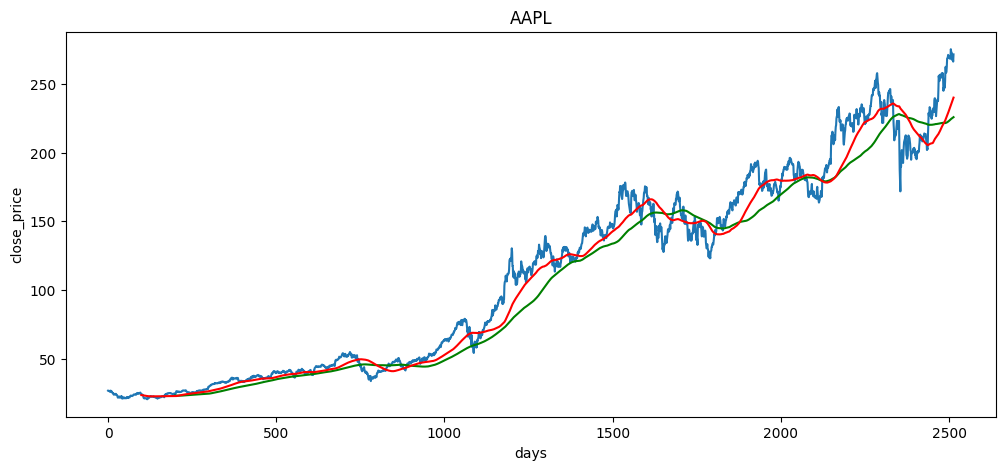

In [36]:

plt.figure(figsize=(12,5))
plt.xlabel("days")
plt.ylabel("close_price")
plt.title(ticker)
plt.plot(df.Close)
plt.plot(df["MA_CLOSE_200"],"g")
plt.plot(df["MA_CLOSE"],"r")

# calculating % in each session 

In [37]:
df["percent_change"]=df.Close.pct_change()

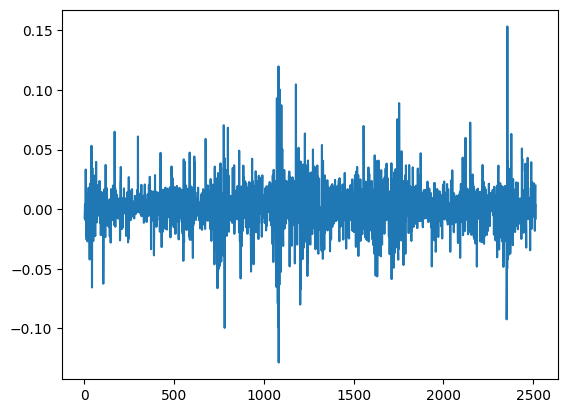

In [38]:
plt.plot(df["percent_change"])

# data preprocessing

In [39]:
df.shape

(2514, 8)

# train test split 

In [40]:
training_data=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
test_data=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

In [41]:
test_data

Ticker,AAPL
1759,149.041504
1760,145.810287
1761,147.947983
1762,148.824814
1763,145.908783
...,...
2509,267.459991
2510,267.440002
2511,268.559998
2512,266.250000


# scaling the data 

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [43]:
data_training_array=scaler.fit_transform(training_data)

In [44]:
data_training_array

array([[0.03932153],
       [0.03810597],
       [0.03779139],
       ...,
       [0.80680569],
       [0.79899542],
       [0.81105467]], shape=(1759, 1))

In [45]:
type(data_training_array)

numpy.ndarray

# sequence creation 

In [46]:
x_train=[]
y_train=[]

for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

y_train
    


[np.float64(0.023349845775320927),
 np.float64(0.021682003969005714),
 np.float64(0.021265043517426918),
 np.float64(0.02040236713820806),
 np.float64(0.019352762018518765),
 np.float64(0.009963935769871785),
 np.float64(0.005664925563117373),
 np.float64(0.004097733971707318),
 np.float64(0.00395393239663791),
 np.float64(0.0061681524428799095),
 np.float64(0.004744750329157638),
 np.float64(0.0041950574066726976),
 np.float64(0.0034428301214543267),
 np.float64(0.0035440731080578214),
 np.float64(0.00445544144821336),
 np.float64(0.003139052772117401),
 np.float64(0.0),
 np.float64(0.0002604203336854516),
 np.float64(0.005120785338786432),
 np.float64(0.004556672337435258),
 np.float64(0.0061044960209050425),
 np.float64(0.0055836795482973045),
 np.float64(0.00705924557147522),
 np.float64(0.008809555228152022),
 np.float64(0.010935948283984004),
 np.float64(0.013424053049631346),
 np.float64(0.01456682010501592),
 np.float64(0.014480009294660229),
 np.float64(0.013771211609382883),


In [47]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [48]:
x_train.ndim

3

# model building 

In [49]:
import tensorflow as tf 
print(tf.__version__)

2.20.0


In [50]:
from keras.models import Sequential 
from keras.layers import Dense , LSTM , Input 


In [51]:
model =Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128 , activation='tanh' , return_sequences=True))
model.add(LSTM(units=64 ))
model.add(Dense(25))
model.add(Dense(1))    

In [ ]:
model.compile(optimizer='adam' , loss ='mean_squared_error')
model.fit(x_train , y_train , epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0093
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.8378e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 6.0051e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.9962e-04
Epoch 5/50
33/52 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 4.6563e-04

In [ ]:
model.summary()

In [ ]:

model.save('stock_prediction_model.keras')

# testing the data 

In [ ]:
last_100_days=training_data.tail(100)
last_100_days

In [ ]:
final_df=pd.concat([last_100_days,test_data], ignore_index=True)

In [ ]:
final_df


In [ ]:
input_data=scaler.fit_transform(final_df)

In [ ]:
input_data

In [ ]:
x_test=[]
y_test=[]
for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test , y_test= np.array(x_test),np.array(y_test)
y_test

# making predictions 

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_predict

In [ ]:
y_predict = scaler.inverse_transform(y_predict.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
y_test

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b')
plt.plot(y_predict , 'r')

# model evaluation 

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test , y_predict)
print(mse)